# Microsoft Original Video Content

# Table of Contents
*[Overvdiew](#over)<br>

*[Business Understanding](#bizund)<br>
*[Data Understanding](#dataund)<br>
*[Data Preperation](#dataprep)<br>
*[Data Import](#dataimport)<br>

*[Data Cleaning](#datacleaning)<br>
*[IMDB Cleaning](#imdbclean)<br>
*[The Numbers (TN) Cleaning](#imdbclean)<br>
*[Data Mergeing](#merge)<br>

*[Analysis](#explore)<br>
*[Average Rating IMDB](#rat)<br>
*[Studios to Hire From](#stud)<br>
*[Allocation of Budget](#bud)<br>
*[Successful Genres](#gen)<br>
*[Direcotrs to Work With](#dir)<br>

*[Conslusion](#con)<br>
*[Nest Steps](#steps)<br>


# Overview <a class="anchor" id="over"></a>

This project analyzes the success of movies based on data gathered from multiple sources: https://www.imdb.com/, https://www.the-numbers.com/, and https://www.boxofficemojo.com/. We've come to the conclusion that genre type, the production budget, and the director play a most noticable role in profits. While it is important to get a good rating, we've found that it is not as important when trying to build capital.

# Business Problem <a class="anchor" id="bizund"></a>

Microsoft is planning on expanding their company developing an original content studio. We believe it best to start with a comprehensive understanding of the current market. Doing so will allow for the best opportunity for success, longevity, and great content.

We've created bar charts and scatter plots that have been a useful practice while coming to our conclusions. Doing so has allowed us to gain an understanding of trends and specific methods we can use to bring in profits. The information we are displaying is from 2012 to 2019.

# Data Understanding <a class="anchor" id="dataund"></a>

In [1]:
# Import linraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

In [2]:
#Access IMDB data through sqlite3

# Connect to sqlite3
conn = sqlite3.connect('../data/im.db')

# Query and join IMDB tables movie_basics, movie_ratings and director information (joined tables directors and perons)

df_imdb = pd.read_sql("""
    SELECT *
    FROM 
    movie_basics AS mb
        LEFT JOIN movie_ratings AS mr
            ON mb.movie_id = mr.movie_id
        LEFT JOIN
            (SELECT *
            FROM directors GROUP BY movie_id) AS dr
            ON mb.movie_id = dr.movie_id
        LEFT JOIN persons AS ps
            ON dr.person_id = ps.person_id
""", conn)

In [3]:
# Import The Numbers dataset
df_tn = pd.read_csv('../data/tn.movie_budgets.csv')

In [4]:
# Import The Numbers dataset
df_bom = pd.read_csv('../data/bom.movie_gross.csv')

In [5]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            146144 non-null  object 
 1   primary_title       146144 non-null  object 
 2   original_title      146123 non-null  object 
 3   start_year          146144 non-null  int64  
 4   runtime_minutes     114405 non-null  float64
 5   genres              140736 non-null  object 
 6   movie_id            73856 non-null   object 
 7   averagerating       73856 non-null   float64
 8   numvotes            73856 non-null   float64
 9   movie_id            140417 non-null  object 
 10  person_id           140417 non-null  object 
 11  person_id           140416 non-null  object 
 12  primary_name        140416 non-null  object 
 13  birth_year          30609 non-null   float64
 14  death_year          856 non-null     float64
 15  primary_profession  139887 non-nul

In [6]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Data Preperation <a class="anchor" id="dataprep"></a>

## Data Cleaning <a class="anchor" id="datacleaning"></a>

### IMDB Cleaning <a class="anchor" id="imdbclean"></a>

In [8]:
# Split genres from IMDB data into spereate columns
df_imdb[['Genre_1','Genre_2', 'Genre_3']] = df_imdb["genres"].str.split(",",expand=True)

# Add colum of avrage rating relative to mean of overall average rating
df_imdb['rating_relative_to_avg'] = df_imdb['averagerating'] - df_imdb['averagerating'].mean()


# Create dataframe of counts of genres
# Count genres by column
df_gen_cnt = df_imdb[['Genre_1', 'Genre_2', 'Genre_3']].apply(pd.Series.value_counts)
# Make NaNs 0
df_gen_cnt = df_gen_cnt.fillna(0)

# Get total count per genre and add to total counts column
df_gen_cnt['total_gen_cnt'] = df_gen_cnt['Genre_1'] + df_gen_cnt['Genre_2'] + df_gen_cnt['Genre_3']

# Create a datafram of genre combinations and their averagerating
df_genres = df_imdb.loc[:, ["Genre_1","Genre_2","Genre_3", "averagerating", "numvotes", 'start_year']]

# A dataframe of genre value counts
df_gen_cnt = df_imdb[['Genre_1', 'Genre_2', 'Genre_3']].apply(pd.Series.value_counts)
df_gen_cnt = df_gen_cnt.fillna(0)
df_gen_cnt['total_gen_cnt'] = df_gen_cnt['Genre_1'] + df_gen_cnt['Genre_2'] + df_gen_cnt['Genre_3']
df_genres = df_genres.dropna(subset=['averagerating'])


In [9]:
df_gen_cnt

,Genre_1,Genre_2,Genre_3,total_gen_cnt
Action,10335,0.0,0.0,10335.0
Adult,23,2.0,0.0,25.0
Adventure,4760,1705.0,0.0,6465.0
Animation,1839,763.0,197.0,2799.0
Biography,8021,656.0,45.0,8722.0
Comedy,21514,3092.0,706.0,25312.0
Crime,3919,2369.0,465.0,6753.0
Documentary,41609,8737.0,1294.0,51640.0
Drama,31343,14559.0,3981.0,49883.0
Family,1108,2980.0,2139.0,6227.0


In [10]:
#Top 50 movies by rating with at least 100,000 votes and released no later than 2012
df_top50_rat = df_imdb[(df_imdb['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)] .sort_values('averagerating', ascending=False)[0:50]

### TN Cleaning <a class="anchor" id="tnclean"></a>

In [11]:
# Remove non-numerical characters from strings that will be converted to numerics
df_tn['production_budget'] = df_tn['production_budget'].str.replace(",","")
df_tn['production_budget'] = df_tn['production_budget'].str.replace("$","")

df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(",","")
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace("$","")

df_tn['domestic_gross'] = df_tn['worldwide_gross'].str.replace(",","")
df_tn['domestic_gross'] = df_tn['worldwide_gross'].str.replace("$","")

In [12]:
# Convert strings representing money values to numeric
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].astype('int64')
df_tn['production_budget'] = df_tn['production_budget'].astype('int64')
df_tn['domestic_gross'] = df_tn['domestic_gross'].astype('int64')

In [13]:
# Convert the data type of the 'release_date' column to a date
df_tn['release_date'] = pd.to_datetime(df_tn['release_date'],format="%b %d, %Y")

# Add a new columns 'year'
df_tn['release_year'] = df_tn['release_date'].dt.year

# Create key column movie + year
df_tn['release_year'] = df_tn['release_year'].astype(str)
df_tn['mov_yr_key'] = df_tn['movie'] + "-" + df_tn['release_year']

In [14]:
# Create a column of wordwide profit by sibtracting production budget from worldwide gross
df_tn['worldwide_profit'] = df_tn['worldwide_gross'] - df_tn['production_budget']

### BOM

In [15]:
# # Remove non-numerical characters from strings that will be converted to numerics
df_bom['foreign_gross'] = df_bom['foreign_gross'].str.replace(",","")

# Convert strings representing money values to numeric
df_bom['foreign_gross'] = df_bom['foreign_gross'].astype(float)

# Create a column of total gross by adding together foreign gross and domesitc gross
df_bom['total_gross'] = df_bom['foreign_gross'] + df_bom['domestic_gross']

### Data Merging <a class="anchor" id="merge"></a>

Before merging the datasets, we created new column in both the IMDB and TN datasets 'mov_yr_key' a conbination of the title and year string columns of each data set.

We originally tried merging on only columns that contained the movei titles, however, the same title can apply to multiple movies, causing data mixup. As an example, when we first merged the dataframes, the left dataframe row with data on James Cameron's 2009 "Avatar" was merged with Atsushi Wada's 2011 movie by the same name from the right dataframe.

In [16]:
df_imdb['year_str'] = df_imdb['start_year'].astype(str)
df_imdb['mov_yr_key'] = df_imdb['primary_title'] + "-" + df_imdb['year_str']

In [17]:
# Merge the imdb and tn datasets on 'mov_yr_key'
df_tn_imdb = df_tn.merge(df_imdb,how='inner',left_on='mov_yr_key', right_on='mov_yr_key',suffixes=('_tn', '_imdb'))

To focus on recent trend and successes in the indiustry, we will focus on movies made no older than 2012.

In [18]:
# Create filtered dataFrame of merged data to only include movies made since 2012
df_tn_imdb_filt_year = df_tn_imdb[df_imdb['start_year'] >= 2012]

# Create filtered dataFrame of merged data to only include movies made since 2012 
#and made a worldwide profit of at least $50,000,000
df_tn_imdb_filt_year_5hunthou = df_tn_imdb_filt_year[df_tn_imdb_filt_year['worldwide_profit'] > 50000000]

# Create filtered dataFrame of merged data to only include movies with at leaste 100000 votes and made since 2012
df_tn_imdb_filt = df_tn_imdb[(df_tn_imdb['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)]
df_bom_filt = df_bom[df_bom['year'] >= 2012]

<ipython-input-18-c1ded018ef5d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tn_imdb_filt_year = df_tn_imdb[df_imdb['start_year'] >= 2012]
<ipython-input-18-c1ded018ef5d>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tn_imdb_filt = df_tn_imdb[(df_tn_imdb['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)]


# Analysis <a class="anchor" id="explore"></a>

## Average User Rating on IMDB <a class="anchor" id="rat"></a>

To start to understand the data and movie related data in general, we first looked at the average IMDB user rating for top rated films. We then wanted to see if there was a relation between number of votes and avg rating, to see if more popular (measured by number of votes) or less popular movies had an advantage in recieving high average ratings. Next, we checked on a relationship between average rating and profit. Does an higher average score on IMDB incrrease the likelihood of higher profit?

<ipython-input-19-efc2e5935fa8>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1, rotation=45, ha = 'right', rotation_mode = 'anchor')
<ipython-input-19-efc2e5935fa8>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x2, rotation=45, ha = 'right', rotation_mode = 'anchor')


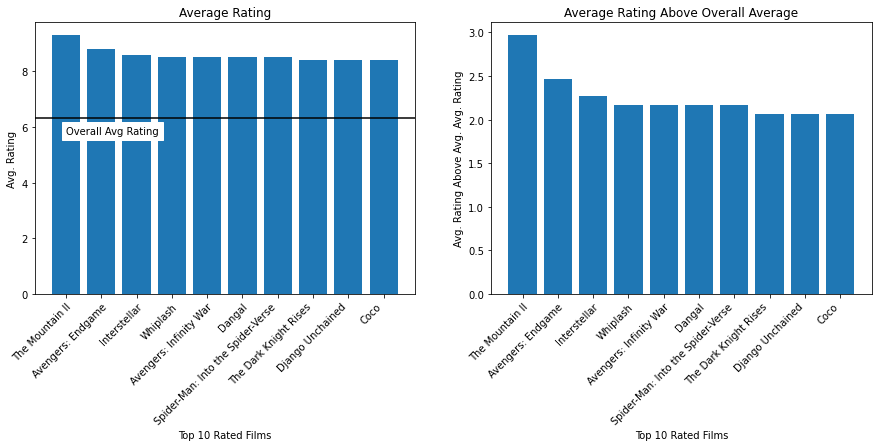

In [19]:
# Viz of Top 10 movies by rating with at least 100,000 votes and released no later than 2012
df_top10_rat = df_top50_rat[0:10]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_top10_rat['primary_title']
y1 = df_top10_rat['averagerating']

x2 = df_top10_rat['primary_title']
y2 = df_top10_rat['rating_relative_to_avg']

ax1.axhline(6.332729, c="black")
ax1.text(0,5.75,"Overall Avg Rating", backgroundcolor="White")

ax1.set_xticklabels(x1, rotation=45, ha = 'right', rotation_mode = 'anchor')
ax2.set_xticklabels(x2, rotation=45, ha = 'right', rotation_mode = 'anchor')

ax1.set_xlabel("Top 10 Rated Films")
ax1.set_ylabel("Avg. Rating")

ax2.set_xlabel("Top 10 Rated Films")
ax2.set_ylabel("Avg. Rating Above Avg. Avg. Rating")

ax1.set_title("Average Rating")
ax2.set_title("Average Rating Above Overall Average")

ax1.bar(x1,y1)
ax2.bar(x2,y2)

plt.savefig('../images/avg_rat_bmov', bbox_inches='tight')

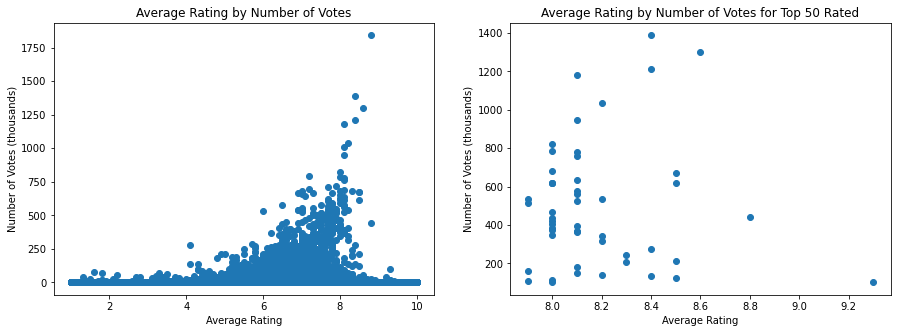

In [20]:
# Viz of comparison of number of votes and average rating

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_imdb['averagerating']
y1 = df_imdb['numvotes']/1000

x2 = df_top50_rat['averagerating']
y2 = df_top50_rat['numvotes']/1000


ax1.set_xlabel("Average Rating")
ax1.set_ylabel("Number of Votes (thousands)")
ax1.set_title("Average Rating by Number of Votes")

ax2.set_xlabel("Average Rating")
ax2.set_ylabel("Number of Votes (thousands)")
ax2.set_title("Average Rating by Number of Votes for Top 50 Rated")

ax1.scatter(x1,y1)
ax2.scatter(x2,y2)

In [21]:
# Get correlation average rating and number of votes
df_tn_imdb_filt['averagerating'].corr(df_tn_imdb_filt['numvotes'])

0.49613474170077504

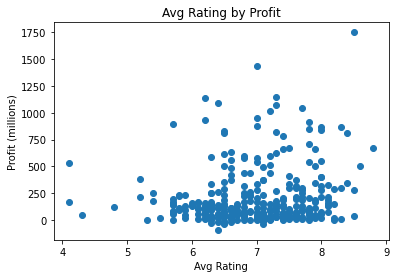

In [22]:
# Vizualize Average Rating by Profit
fig, ax = plt.subplots()

x = df_tn_imdb_filt['averagerating']
y = df_tn_imdb_filt['worldwide_profit']/1000000

ax.set_xlabel("Avg Rating")
ax.set_ylabel("Profit (millions)")
ax.set_title("Avg Rating by Profit")



ax.scatter(x,y)

In [23]:
# Get correlation average rating and worldwide profit
df_tn_imdb_filt['averagerating'].corr(df_tn_imdb_filt['worldwide_profit'])

0.14375206103201144

Average rating does not have a strong correlation to profit, and therefor we only use it as a measure of possible "industry credit" and not for a successful finacial indicator.

### Studios to Hire From <a class="anchor" id="stud"></a>

Microsoft will need to staff the new movie studio with successful and experienced persons. We identified the top movie studios since 2012 by movies made and total gross to create a list of the studios where Microsoft should look to hire from.

In [24]:
# Group by studio and examine largest sums of total gross
df_bom_filt.groupby('studio').sum().sort_values('total_gross', ascending=False)

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
BV,1.570240e+10,2.117251e+10,157157,3.686251e+10
Fox,8.967700e+09,1.702962e+10,209547,2.597232e+10
Uni.,1.105189e+10,1.457537e+10,235767,2.561691e+10
WB,9.073773e+09,1.416202e+10,209564,2.319382e+10
Sony,6.550983e+09,1.149014e+10,175332,1.804092e+10
...,...,...,...,...
Gaatri,8.980000e+05,0.000000e+00,2016,0.000000e+00
Fathom,1.144700e+07,0.000000e+00,20177,0.000000e+00
FOR,1.020000e+04,0.000000e+00,2015,0.000000e+00


In [25]:
# Select the top 10 studios by sum of total gross and save to a variable
top10_stud_filt = df_bom_filt.groupby('studio').sum().sort_values('total_gross', ascending=False)[:10]
top10_stud_filt

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
BV,1.570240e+10,2.117251e+10,157157,3.686251e+10
Fox,8.967700e+09,1.702962e+10,209547,2.597232e+10
Uni.,1.105189e+10,1.457537e+10,235767,2.561691e+10
WB,9.073773e+09,1.416202e+10,209564,2.319382e+10
Sony,6.550983e+09,1.149014e+10,175332,1.804092e+10
Par.,5.298605e+09,9.049485e+09,159185,1.424340e+10
WB (NL),3.416300e+09,5.567200e+09,72549,8.962900e+09
LGF,3.427902e+09,3.811285e+09,161198,7.106475e+09
LG/S,2.078200e+09,3.353724e+09,82599,5.318924e+09


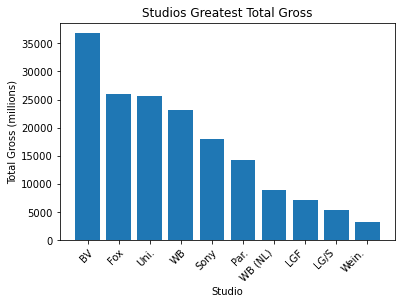

In [26]:
# Vizualize top 10 studios by sum of total gross since 2012
fig, ax = plt.subplots()

x = top10_stud_filt.index
y = top10_stud_filt['total_gross']/1000000

ax.set_xlabel("Studio")
ax.set_ylabel("Total Gross (millions)")
ax.set_title("Studios Greatest Total Gross")

ha = ['right', 'center', 'left']

plt.xticks(rotation=45, ha = 'right', rotation_mode = 'anchor')

ax.bar(x,y)

plt.savefig('../images/top_studios_filt_gross.png', bbox_inches='tight')

In [27]:
# Select the top 10 studios by number of movies released
stud_top_num_mov = df_bom_filt.value_counts(subset='studio')[:10]
stud_top_num_mov

studio
Uni.     117
IFC      111
Fox      104
WB       104
Magn.     99
SPC       88
Sony      87
LGF       80
Par.      79
BV        78
dtype: int64

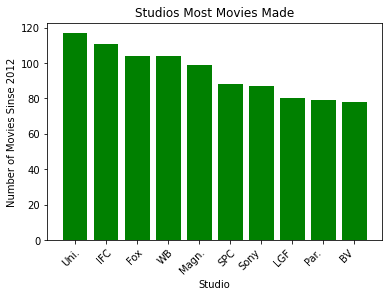

In [28]:
# Vizualize top 10 studios by number of movies released
fig, ax = plt.subplots()

x = stud_top_num_mov.index
y = stud_top_num_mov.values

ax.set_xlabel("Studio")
ax.set_ylabel("Number of Movies Sinse 2012")
ax.set_title("Studios Most Movies Made")

ha = ['right', 'center', 'left']

plt.xticks(rotation=45, ha = 'right', rotation_mode = 'anchor')

ax.bar(x,y, color="green")
plt.savefig('../images/top_studios_filt_num_movs', bbox_inches='tight')

## Allocation of Budget<a class="anchor" id="bud"></a>

Microsoft will need to knwo how much budget to allocate to it's new movies. We looked at the relationship between production budget and average rating and worldwide profit.

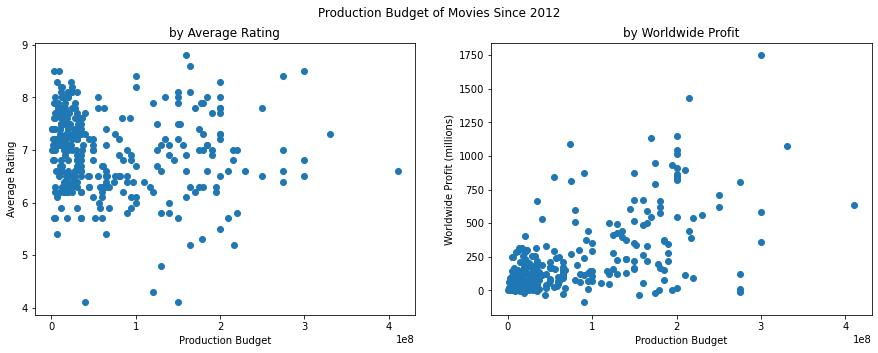

In [29]:
# Vizualize produciton budget vs average rating & production budget vs worldwide profit
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

plt.suptitle("Production Budget of Movies Since 2012")

x1 = df_tn_imdb_filt['production_budget']
y1 = df_tn_imdb_filt['averagerating']

x2 = df_tn_imdb_filt['production_budget']
y2 = df_tn_imdb_filt['worldwide_profit']/1000000


ax1.set_xlabel("Production Budget")
ax1.set_ylabel("Average Rating")
ax1.set_title("by Average Rating")

ax2.set_xlabel("Production Budget")
ax2.set_ylabel("Worldwide Profit (millions)")
ax2.set_title("by Worldwide Profit")

ax1.scatter(x1, y1)
ax2.scatter(x2, y2)

plt.savefig('../images/bud_filt_avgrat_wwprofit', bbox_inches='tight')

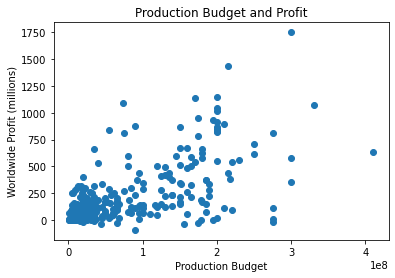

In [30]:
# Singling out production budget vs worldwide profit since 2012
fig, ax = plt.subplots()

x = df_tn_imdb_filt['production_budget']
y = df_tn_imdb_filt['worldwide_profit']/1000000


ax.set_xlabel("Production Budget")
ax.set_ylabel("Worldwide Profit (millions)")
ax.set_title("Production Budget and Profit")

ax.scatter(x, y)

plt.savefig('../images/bud_filt_wwprofit', bbox_inches='tight')

In [31]:
# Get correlation of produciton budget vand average rating
df_tn_imdb_filt['production_budget'].corr(df_tn_imdb_filt['averagerating'])

-0.09842752224249707

In [32]:
# Get correlation of production budget and worldwide profit
df_tn_imdb_filt['production_budget'].corr(df_tn_imdb_filt['worldwide_profit'])

0.6237389744636805

In [33]:
# Get all time correlation of produciton budget vand average rating
df_tn_imdb['production_budget'].corr(df_tn_imdb['averagerating'])

0.2225609389897727

In [34]:
# Get all time correlation of production budget and worldwide profit
df_tn_imdb['production_budget'].corr(df_tn_imdb['worldwide_profit'])

0.6622588394897604

In [35]:
# Mean Budget for films since 2012 that made at least 50,000,000 in profit worldwide
df_tn_imdb_filt_year_5hunthou['production_budget'].mean()

69161538.46153846

In [36]:
# Filter data to find the top movies by worldwide profit since 2012
top15_movs_profit = df_tn_imdb_filt_year.groupby('primary_title').mean().sort_values('worldwide_profit', ascending=False)[0:15]

In [37]:
# Find the average production budget of the top 15 films
top15_movs_profit_avg_probud = top15_movs_profit['production_budget'].mean()

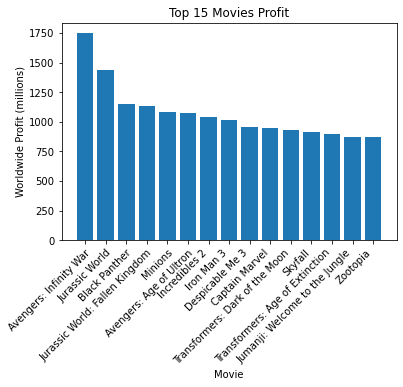

In [38]:
fig, ax = plt.subplots()

x = top15_movs_profit.index
y = top15_movs_profit['worldwide_profit']/1000000

ha = ['right', 'center', 'left']

plt.xticks(rotation=45, ha = 'right', rotation_mode = 'anchor')

ax.set_xlabel('Movie')
ax.set_ylabel('Worldwide Profit (millions)')
ax.set_title('Top 15 Movies Profit')

ax.bar(x,y)

plt.savefig('../images/top_profit_movies_budget_profit', bbox_inches='tight')

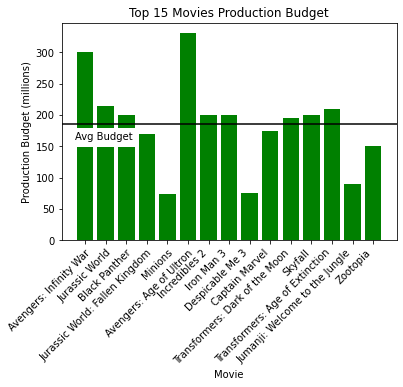

In [51]:
fig, ax = plt.subplots()

x = top15_movs_profit.index
y = top15_movs_profit['production_budget']/1000000

ax.axhline(top15_movs_profit_avg_probud/1000000, c="black")
ax.text(-.5,160,"Avg Budget", backgroundcolor="White")

ha = ['right', 'center', 'left']

plt.xticks(rotation=45, ha = 'right', rotation_mode = 'anchor')

ax.set_xlabel('Movie')
ax.set_ylabel('Production Budget (millions)')
ax.set_title('Top 15 Movies Production Budget')

ax.bar(x,y, color="green")

plt.savefig('../images/top_profit_movies_budget', bbox_inches='tight', dpi=500)

## Successful Genre Combinations <a class="anchor" id="gen"></a>

After hiring staff and allocating budget, the new studio will need to knwo what kinds of movies to make and focus on. We used the data of genre combinations to see what kinds of movies performed best. Future analysis should break down generes combinatiosn into their single genres and their success.

In [40]:
# Looking at the top 10 rated genre combinations with > 100000 votes since 2012
df_top10_gen_comb_rat = df_genres[(df_genres['numvotes'] >= 100000) & (df_genres['start_year'] >= 2012)].groupby(['Genre_1', 'Genre_2', 'Genre_3']).mean().sort_values('averagerating', ascending=False)[:10]
df_top10_gen_comb_rat

averagerating   numvotes  start_year
Genre_1   Genre_2   Genre_3                                       
Action    Drama     War               8.450  241280.50     2015.00
Animation Drama     Fantasy           8.400  134084.00     2016.00
Adventure Drama     Sci-Fi            8.300  989725.00     2014.50
Comedy    Drama     Thriller          8.100  151123.00     2014.00
                    Fantasy           8.000  200574.00     2013.50
Biography Drama     Music             8.000  345466.00     2018.00
Action    Biography Drama             7.850  291407.75     2014.00
Drama     Music     Romance           7.800  249245.00     2018.00
          Mystery   Sci-Fi            7.775  385403.75     2015.25
Biography Drama     Thriller          7.700  415517.00     2013.75

<BarContainer object of 10 artists>

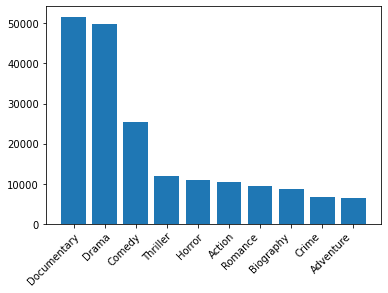

In [41]:
# Viz of genre counts
top10_gen_cnt = df_gen_cnt.sort_values('total_gen_cnt', ascending=False)[0:10]

fig, ax = plt.subplots()

x = top10_gen_cnt.index
y = top10_gen_cnt['total_gen_cnt']

ha = ['right', 'center', 'left']

plt.xticks(rotation=45, ha = "right", rotation_mode = 'anchor')

ax.bar(x,y)

In [42]:
df_com_yr_sr_rat = df_tn_imdb_filt_year.sort_values('averagerating', ascending=False)
top_gen_s_2012 = df_com_yr_sr_rat.loc[:,['genres', 'averagerating', 'worldwide_gross']]
top_gen_s_2012['genres'] = top_gen_s_2012['genres'].str.replace(',', ' - ')
top_gen_s_2012_grp = top_gen_s_2012.groupby('genres').mean()

In [43]:
top10_gen_s2012_brat = top_gen_s_2012_grp.sort_values('averagerating', ascending=False)[0:10]
top10_gen_s2012_brat

,averagerating,worldwide_gross
genres,,
Adventure - Drama - Sci-Fi,8.6,666379375.0
Documentary - Sport,8.4,314444.0
Drama - Mystery - War,8.3,16038343.0
Crime - Documentary,8.3,7799257.0
Documentary - Drama - History,8.1,176262.0
Action - Sci-Fi,7.9,370541256.0
Comedy - Mystery - Thriller,7.9,0.0
Documentary - Drama,7.7,0.0
Biography - Drama - Musical,7.6,386665550.0


In [44]:
top10_gen_s2012_bwrgr = top_gen_s_2012_grp.sort_values('worldwide_gross', ascending=False)[0:10]
top10_gen_s2012_bwrgr

,averagerating,worldwide_gross
genres,,
Fantasy - Musical,6.500000,1.025491e+09
Action - Adventure - Sci-Fi,6.703333,7.405735e+08
Adventure - Drama - Sci-Fi,8.600000,6.663794e+08
Adventure - Fantasy,7.050000,5.790272e+08
Drama - Family - Fantasy,6.900000,5.345514e+08
Action - Adventure - Animation,7.212500,5.310212e+08
Action - Adventure - Thriller,6.342857,4.540020e+08
Action - Adventure - Fantasy,6.250000,4.303633e+08
Adventure - Animation - Comedy,6.390000,4.027423e+08


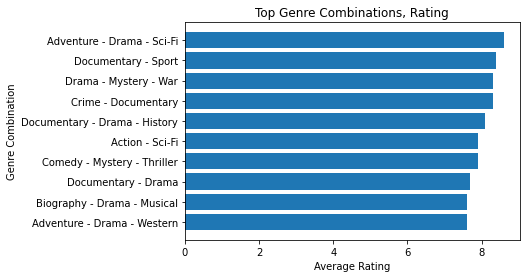

In [45]:
fig, ax = plt.subplots()

x = top10_gen_s2012_brat.index
y = top10_gen_s2012_brat['averagerating']

ax.set_xlabel("Average Rating")
ax.set_ylabel("Genre Combination")
ax.set_title("Top Genre Combinations, Rating")

plt.gca().invert_yaxis()

ax.barh(x,y)
plt.savefig('../images/top_gen_s_2012_b_avg_rat', bbox_inches='tight')

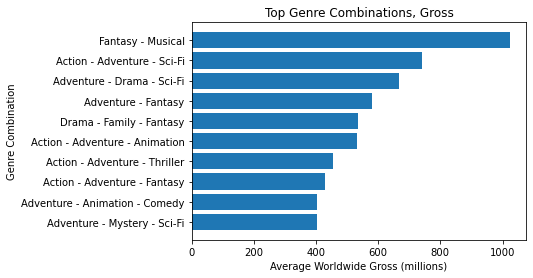

In [46]:
fig, ax = plt.subplots()

x = top10_gen_s2012_bwrgr.index
y = top10_gen_s2012_bwrgr['worldwide_gross']/1000000

ax.set_xlabel("Average Worldwide Gross (millions)")
ax.set_ylabel("Genre Combination")
ax.set_title("Top Genre Combinations, Gross")

plt.gca().invert_yaxis()

ax.barh(x,y)
plt.savefig('../images/top_gen_s_2012_b_avg_wwgr', bbox_inches='tight')

## Directors to Work With <a class="anchor" id="dir"></a>

In addition to the most successful genres, we looked into the most succesfull directors since 2012 so Microsoft will know who to build relationships with and hire onto movies. We looked at director success through the lenses of being in the top 50 user rated movies (for industry acceptance and awareness) and average profit per movie.

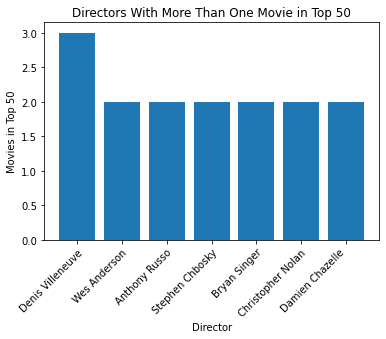

In [47]:
# Viz of the directors who have more than one film in the top 50 rated movies since 2012 with more than 100000 votes

# Create a series of directors who have more than one film in the top 50 rated movies since 2012 with more than 100000 votes
dir_mul_top50 = df_top50_rat.value_counts('primary_name')[0:7]

fig, ax = plt.subplots()

x = dir_mul_top50.index
y = dir_mul_top50.values

ha = ['right', 'center', 'left']

plt.xticks(rotation=45, ha = 'right', rotation_mode = 'anchor')

ax.set_xlabel('Director')
ax.set_ylabel('Movies in Top 50')
ax.set_title('Directors With More Than One Movie in Top 50')

ax.bar(x,y)
plt.savefig('../images/top_studios_all_data', bbox_inches='tight')

In [48]:
# Filter data to find the top ten directors by total profit since 2012 who's movies have at least 100000 votes
top10_dirs_profit = df_tn_imdb_filt_year.groupby('primary_name').mean().sort_values('worldwide_profit', ascending=False)[0:10]

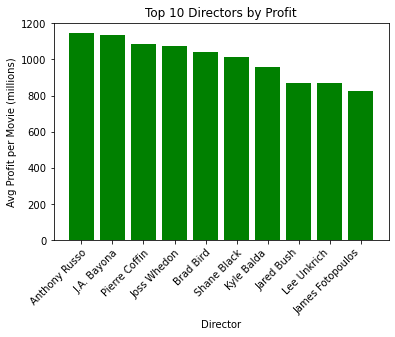

In [49]:
# Vizualize top 10 directors by average worldwide profit per movie
fig, ax = plt.subplots()

x = top10_dirs_profit.index
y = top10_dirs_profit['worldwide_profit']/1000000

ax.set_xlabel("Director")
ax.set_ylabel("Avg Profit per Movie (millions)")
ax.set_title("Top 10 Directors by Profit")

ha = ['right', 'center', 'left']
plt.xticks(rotation=45, ha = 'right', rotation_mode = 'anchor')

ax.bar(x,y, color="green")
plt.savefig('../images/top_dirs_profit_s_2012', bbox_inches='tight')

# Conclusions <a class="anchor" id="con"></a>

# Nest Steps <a class="anchor" id="steps"></a>